In [ ]:
#@title Common Imports { display-mode: "form" }
!pip install catboost
!pip install optuna
!pip install 'lightgbm==3.0.0'
!pip install pytorch_tabnet
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

from catboost import CatBoostRegressor
import catboost as cb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn import preprocessing, impute
from sklearn.ensemble import HistGradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
import optuna
import lightgbm as lgb
from optuna.integration import lightgbm as opt_lgb
from sklearn.model_selection import StratifiedKFold, PredefinedSplit, train_test_split
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


from statsmodels.stats.outliers_influence import variance_inflation_factor

     |████████████████████████████████| 76.1 MB 42 kB/s 
     |████████████████████████████████| 308 kB 7.5 MB/s 
     |████████████████████████████████| 81 kB 4.7 MB/s 
     |████████████████████████████████| 210 kB 38.6 MB/s 
     |████████████████████████████████| 78 kB 5.2 MB/s 
     |████████████████████████████████| 150 kB 41.9 MB/s 
     |████████████████████████████████| 113 kB 38.3 MB/s 
     |████████████████████████████████| 49 kB 3.9 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=a18d811603753536c5504282bdde2a598b8f1e065c930846cc52093cb593ec85
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 1.7 MB 10.0 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title  Read Data { display-mode: "form" }
drive.mount('/content/drive/')
path = '/content/drive/Shareddrives/DA224-O/mp_2/data/train.csv'
df = pd.read_csv(path)
print(df.head())
path2 = '/content/drive/Shareddrives/DA224-O/mp_2/data/test.csv'
df_test = pd.read_csv(path2)

Mounted at /content/drive/
   id  song_duration_ms  acousticness  danceability    energy  \
0   0          212990.0      0.642286      0.856520  0.707073   
1   1               NaN      0.054866      0.733289  0.835545   
2   2          193213.0           NaN      0.188387  0.783524   
3   3          249893.0      0.488660      0.585234  0.552685   
4   4          165969.0      0.493017           NaN  0.740982   

   instrumentalness   key  liveness  loudness  audio_mode  speechiness  \
0          0.002001  10.0       NaN -5.619088           0     0.082570   
1          0.000996   8.0  0.436428 -5.236965           1     0.127358   
2         -0.002694   5.0  0.170499 -4.951759           0     0.052282   
3          0.000608   0.0  0.094805 -7.893694           0     0.035618   
4          0.002033  10.0  0.094891 -2.684095           0     0.050746   

        tempo  time_signature  audio_valence  song_popularity  
0  158.386236               4       0.734642                0  
1  102.75

In [ ]:
#@title Data Information { display-mode: "form" }
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                30000 non-null  int64  
 1   song_duration_ms  26933 non-null  float64
 2   acousticness      26976 non-null  float64
 3   danceability      27033 non-null  float64
 4   energy            27065 non-null  float64
 5   instrumentalness  27034 non-null  float64
 6   key               26926 non-null  float64
 7   liveness          26978 non-null  float64
 8   loudness          27023 non-null  float64
 9   audio_mode        30000 non-null  int64  
 10  speechiness       30000 non-null  float64
 11  tempo             30000 non-null  float64
 12  time_signature    30000 non-null  int64  
 13  audio_valence     30000 non-null  float64
 14  song_popularity   30000 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 3.4 MB


In [ ]:
#@title Describe data { display-mode: "form" }
df.describe()

,id,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_popularity
count,30000.000000,26933.000000,26976.000000,27033.000000,27065.000000,27034.000000,26926.000000,26978.000000,27023.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000
mean,14999.500000,193309.698660,0.277219,0.571056,0.683746,0.036184,5.044752,0.198926,-7.418965,0.321167,0.093773,116.557754,3.393967,0.581015,0.36440
std,8660.398374,45713.675116,0.298704,0.189676,0.213314,0.149116,3.379665,0.151879,3.892481,0.466932,0.083474,26.188606,0.525198,0.237429,0.48127
min,0.000000,25658.000000,-0.013551,0.043961,-0.001682,-0.004398,0.000000,0.027843,-30.170399,0.000000,0.015065,63.478876,2.000000,0.013398,0.00000
25%,7499.750000,166492.000000,0.039530,0.425141,0.538968,0.000952,2.000000,0.111956,-9.586576,0.000000,0.038421,97.000171,3.000000,0.398907,0.00000
50%,14999.500000,186908.000000,0.140486,0.607879,0.705028,0.001967,6.000000,0.136253,-6.356886,0.000000,0.055611,113.795116,3.000000,0.599059,0.00000
75%,22499.250000,215039.000000,0.484065,0.718443,0.870518,0.003226,8.000000,0.213505,-4.618818,1.000000,0.117877,128.497863,4.000000,0.760160,1.00000
max,29999.000000,470577.000000,1.065284,0.957131,1.033434,1.075415,11.000000,1.065298,-0.877346,1.000000,0.560748,218.637439,5.000000,1.022283,1.00000


In [ ]:
#@title Data Shape { display-mode: "form" }
df.shape

(30000, 15)

In [ ]:
#@title Data type conversion, feature drop for EDA { display-mode: "form" }
#Datatype conversion
df.drop(columns=['id'], axis=1, inplace=True) #cannot convert in to categorical if we have Nan Values
mainDF = df.copy()
#df = df.apply(lambda x: x.fillna(x.value_counts().index[0])) #filling with most frequently occuring category
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

df['key'] = df.key.astype('category')
df['audio_mode'] = df.audio_mode.astype('category')
df['time_signature'] = pd.Categorical(df.time_signature)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   song_duration_ms  30000 non-null  float64 
 1   acousticness      30000 non-null  float64 
 2   danceability      30000 non-null  float64 
 3   energy            30000 non-null  float64 
 4   instrumentalness  30000 non-null  float64 
 5   key               30000 non-null  category
 6   liveness          30000 non-null  float64 
 7   loudness          30000 non-null  float64 
 8   audio_mode        30000 non-null  category
 9   speechiness       30000 non-null  float64 
 10  tempo             30000 non-null  float64 
 11  time_signature    30000 non-null  category
 12  audio_valence     30000 non-null  float64 
 13  song_popularity   30000 non-null  int64   
dtypes: category(3), float64(10), int64(1)
memory usage: 2.6 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f757e7c59d0>,
      dtype=object)

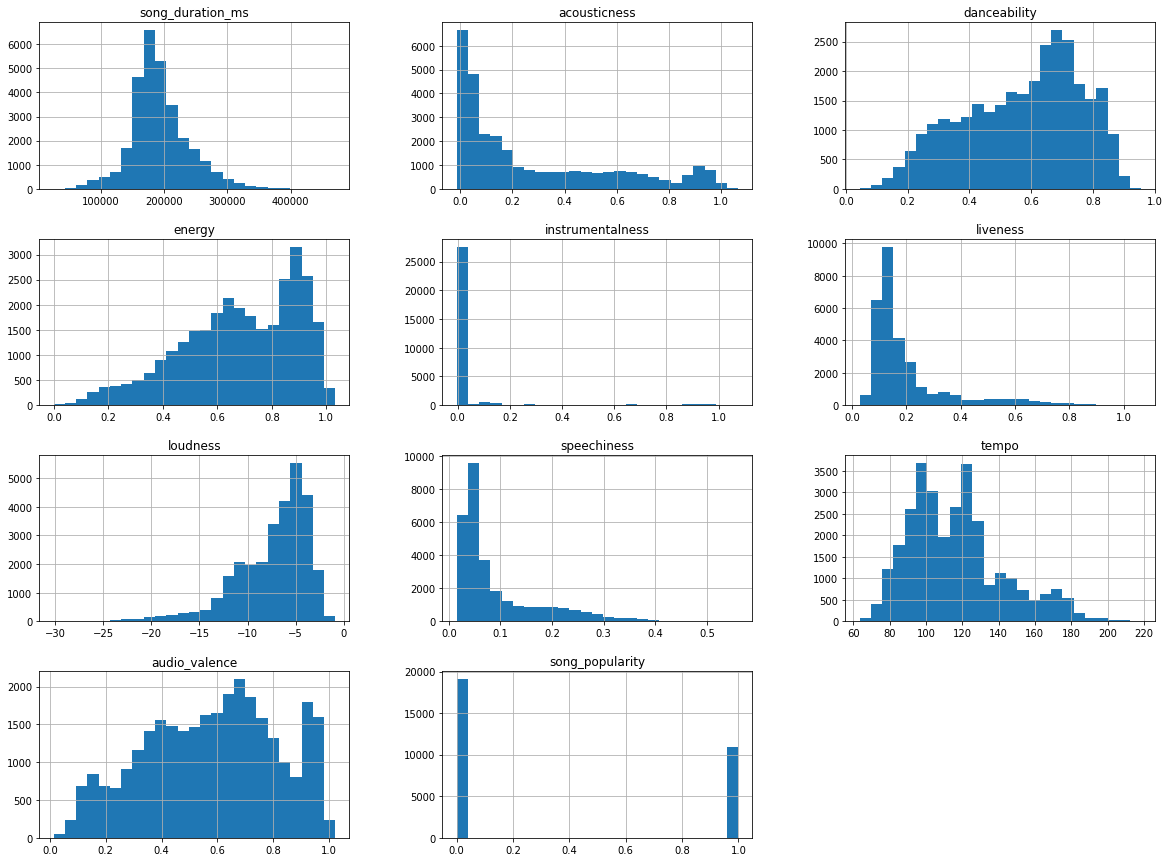

In [ ]:
#@title Data Histogram { display-mode: "form" }
df.hist(bins=25,figsize=(20,15))

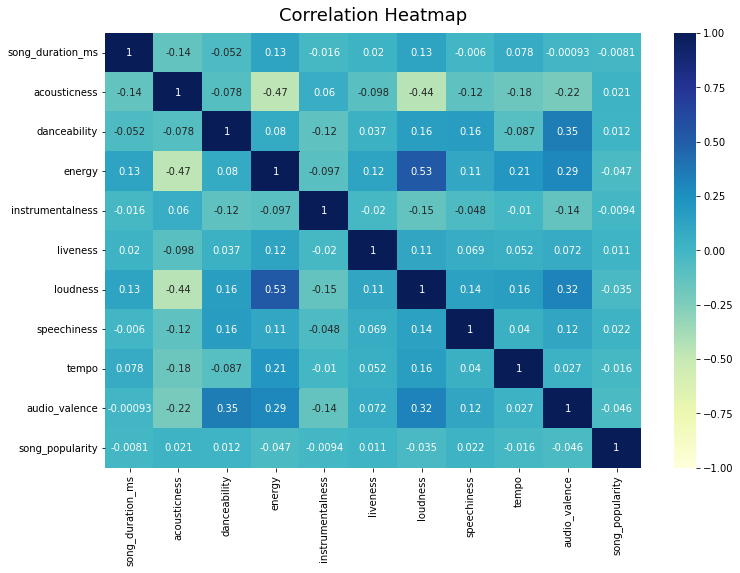

In [ ]:
#@title Correlation heat map { display-mode: "form" }
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

From above graph we can see energy is highly positively correlated with loudness and negatively correlated with acousticness, danceability is correlated with audio valence, audio valence is correlated with both danceability and loudness

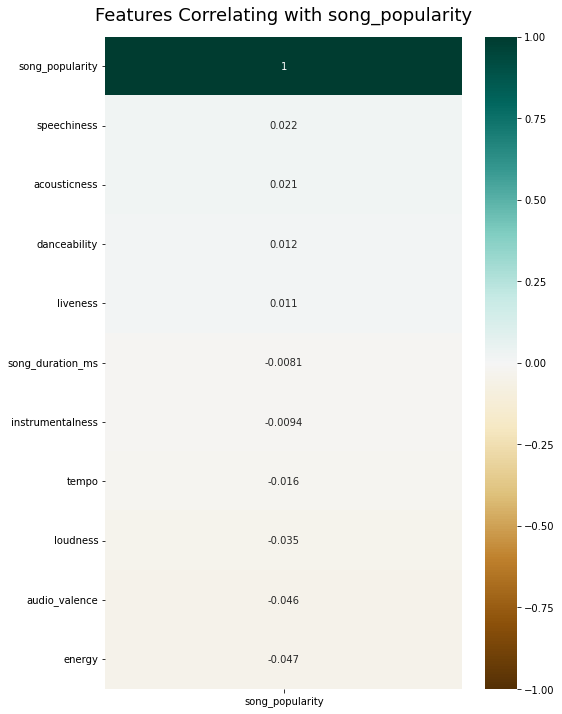

In [ ]:
#@title Features correlation with target song popularity { display-mode: "form" }
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['song_popularity']].sort_values(by='song_popularity', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with song_popularity', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapSong.png', dpi=300, bbox_inches='tight')

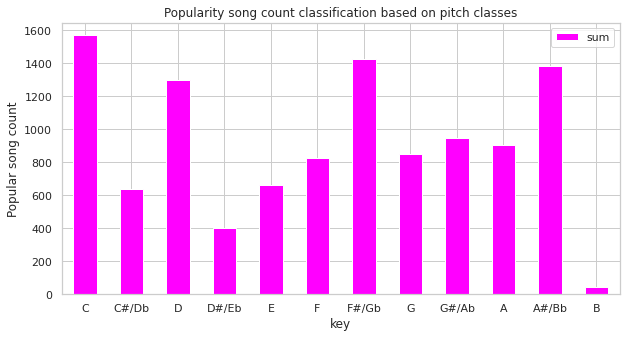

In [ ]:
#@title Below Bar graph shows  songs popularity dependency on pitch class { display-mode: "form" }
keybar = df.groupby(['key'])["song_popularity"].agg(['sum'])
keybar.plot.bar(y='sum', color='magenta', figsize=(10, 5), rot=0)
sns.set_theme(style="whitegrid")
# sns.barplot(x="key", y="sum", data=month)
plt.ylabel("Popular song count")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B'])
plt.title("Popularity song count classification based on pitch classes")
plt.legend(loc='upper right')
plt.savefig('pitch_classify.png', dpi=300, bbox_inches='tight')

From above graph we can see C, D, F#/Gb, A#/Bb has maximum popular songs

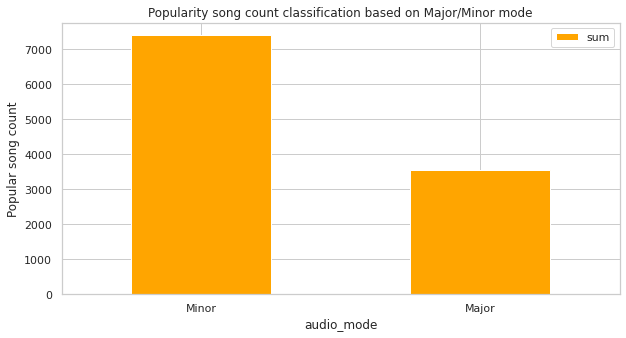

In [ ]:
#@title Below bar graph shows  song popularity dependency on audio mode { display-mode: "form" }
modebar = df.groupby(['audio_mode'])["song_popularity"].agg(['sum'])
modebar.plot.bar(y='sum', color='orange', figsize=(10, 5), rot=0)
sns.set_theme(style="whitegrid")
# sns.barplot(x="key", y="sum", data=month)
plt.ylabel("Popular song count")
plt.xticks([0, 1], ['Minor', 'Major'])
plt.title("Popularity song count classification based on Major/Minor mode")
plt.legend(loc='upper right')
plt.savefig('mode_classify.png', dpi=300, bbox_inches='tight')

From above graph we can see that songs in minor audio mode are more popular than songs in major audio mode

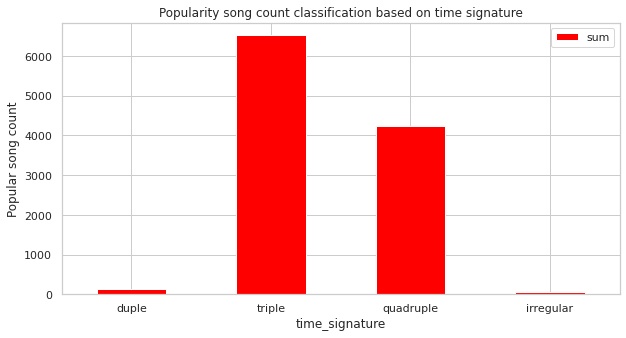

In [ ]:
#@title Below bar graph shows song popularity dependency on time signature { display-mode: "form" }
timesignbar = df.groupby(['time_signature'])["song_popularity"].agg(['sum'])
timesignbar.plot.bar(y='sum', color='red', figsize=(10, 5), rot=0)
sns.set_theme(style="whitegrid")
# sns.barplot(x="key", y="sum", data=month)
plt.ylabel("Popular song count")
plt.xticks([0, 1, 2, 3], ['duple', 'triple', 'quadruple', 'irregular'])
plt.title("Popularity song count classification based on time signature")
plt.legend(loc='upper right')
plt.savefig('timesign_classify.png', dpi=300, bbox_inches='tight')

Triple, quadruple time signature has more popular songs, duple, irregular has very less popular songs

In [ ]:
#@title Detect multicollinearity using variance inflation factor { display-mode: "form" }
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores
df1 = df.iloc[:,:-1]
vif_scores(df1)

,Independent Features,VIF Scores
0,song_duration_ms,16.478231
1,acousticness,2.443647
2,danceability,10.911900
3,energy,16.501961
4,instrumentalness,1.097361
5,key,3.387602
6,liveness,2.763560
7,loudness,5.806481
8,audio_mode,1.481822
9,speechiness,2.377129


In [ ]:
#@title Stratified sampling function based on acousticness { display-mode: "form" }
#stratified sampling with acousticness
def stratified_sampling(df):
  acc_data = df.copy()
  acc_data["acc_cat"] = pd.cut(acc_data["acousticness"],bins=[-1.0, 0.2, 0.4, 0.6, 0.8, 2.0], labels=[1,2,3,4,5]) #when min was given as 0, issue, 0 was classified as Nan
  df_train_strat, df_test_strat = train_test_split(acc_data, test_size=0.2, random_state=42, stratify=acc_data["acc_cat"])
  df_train_strat.drop("acc_cat", axis=1, inplace=True) # income_cat was created for stratified split. Its use is over. Let us remove it.
  df_test_strat.drop("acc_cat", axis=1, inplace=True)
  return df_train_strat, df_test_strat

Eigenvalues:
[2.65518635 1.36700936 1.04416533 1.00792017 0.98917292 0.95699622
 0.93074275 0.91190546 0.90052928 0.84115965 0.78848678 0.59906101
 0.55345284 0.45479524]

Variances (Percentage):
[18.96482656  9.7639457   7.45801299  7.19912979  7.06522649  6.83540247
  6.64788549  6.513339    6.43208396  6.00803286  5.63181378  4.27882894
  3.95306986  3.2484021 ]



Text(0, 0.5, 'Explained variance (%)')

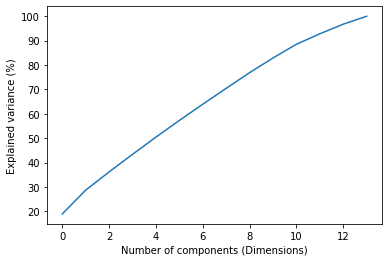

In [ ]:
#@title Experiment Using PCA  { display-mode: "form" }
df_train_strat, df_test_strat = stratified_sampling(df)
songdata = df_train_strat.copy()
songtest = df_test_strat.copy()
#test with PCA
numerical_col=['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']
sc = StandardScaler()
songdata_scaled = sc.fit_transform(songdata)
pca = PCA(n_components=None)
pca.fit(songdata_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")  

We can see from above graph, all components play a vital role, though we have some multi collinearity in data set, we don't need to think that it would affect prediction and hence PCA is not needed for this data set.

          0         1         2         3         4         5         6
0 -1.498086 -2.060766  2.253236  0.852410 -0.308465  1.177783  0.196069
1 -1.935637 -0.955168  1.326517 -1.412435 -0.590457 -0.605091  1.401026
2  0.095035  1.636031  0.749789 -0.108135 -1.245151 -0.237512 -0.342180
3 -0.903649 -0.052102  3.703418 -0.699530  0.427175  0.883574 -2.074655
4 -0.524906  2.019114 -1.315646 -1.371871 -0.950683  0.732751  0.873608

Size: 
(24000, 7)


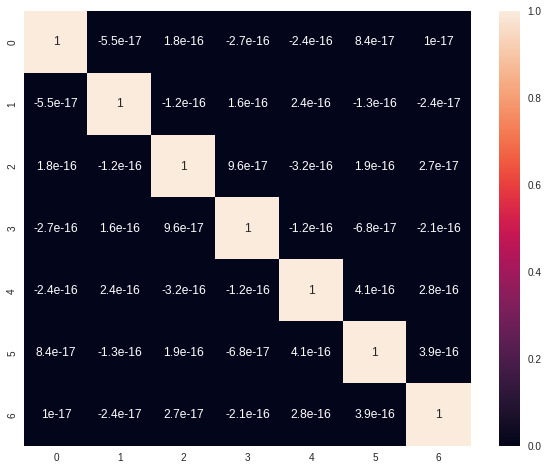

In [ ]:
#@title Plot PCA correlation matrix with components=7 { display-mode: "form" }
sc = StandardScaler()
songdata_scaled = sc.fit_transform(songdata)
pca = PCA(n_components=7)
songdata_pca = pca.fit_transform(songdata_scaled)
songdata_pca = pd.DataFrame(songdata_pca)
print(songdata_pca.head())
print("\nSize: ")
print(songdata_pca.shape)
fig = plt.figure(figsize=(10, 8))
sns.heatmap(songdata_pca.corr(), 
            annot=True)

(24000, 13) (24000,) (6000, 13) (6000,)


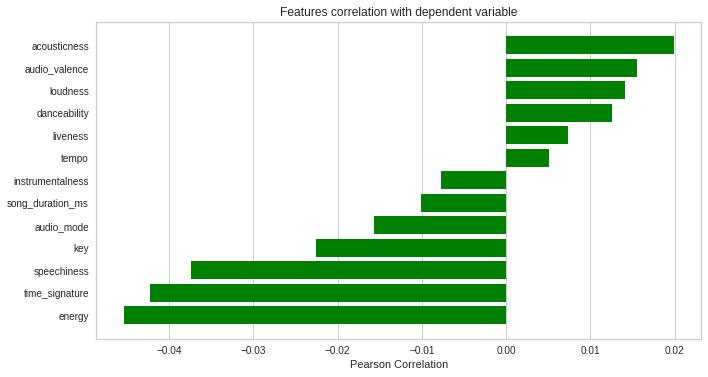

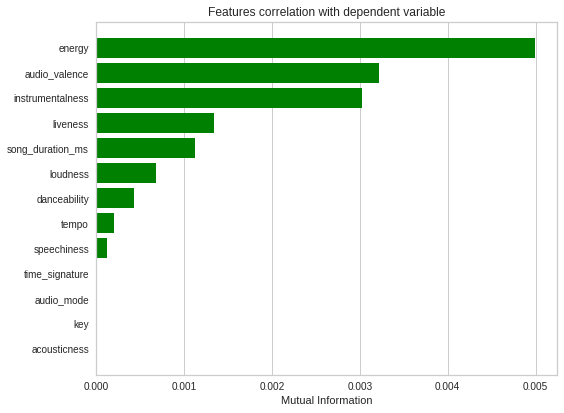

In [ ]:
#@title Pearson corelation and mutual information { display-mode: "form" }
song = songdata.drop("song_popularity", axis=1) # drop labels for training set
song_labels = songdata["song_popularity"].copy() 
song_test = songtest.drop("song_popularity", axis=1) # drop labels for test set
song_test_labels = songtest["song_popularity"].copy()
print(song.shape, song_labels.shape, song_test.shape, song_test_labels.shape)

from yellowbrick.target import FeatureCorrelation
plt.figure(figsize=(10, 5))
featurelist=['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence', 'key', 'audio_mode', 'time_signature']
features = np.array(featurelist)
visualizer = FeatureCorrelation(labels=features, color='Green', sort=True)
visualizer.fit(song, song_labels)
plt.savefig('pearson_correlation.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
visualizer.show()

visualizer = FeatureCorrelation(labels=features, color='Green',method='mutual_info-classification', sort=True)
visualizer.fit(song, song_labels, random_state=42)
plt.savefig('Mutual_Information.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
visualizer.show()

In [ ]:
#@title Metric function { display-mode: "form" }
def getAccuracy(y_test, y_pred):
  report = classification_report(y_test, y_pred)
  print("Classification report-->\n", report)
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix_show(cm)
  tp, fn, fp, tn = cm.reshape(-1)
  print('Confusion matrix-->', 'tp=', tp, 'fn=', fn, 'fp=', fp, 'tn=', tn)
  acc_score = accuracy_score(y_test, y_pred)
  print("Accuracy score-->", acc_score)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
  auc = metrics.auc(fpr, tpr)
  print("AUC --> ", auc)
  return auc 

# Function to create a confusion matrix 
def conf_matrix_show(con_mat):    
    # Creating a confusion matrix
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [ ]:
#@title Prepare data by KNN imputing, scaling and applying OHE on cat columns { display-mode: "form" }
def prepare_data(train, test, categorical_col, numerical_col, numneighbours):
  """ Preprocessing the data"""
  #Function takes input the creditcard_dataset and the list of the names of categorical columns and numerical columns, and 
  #returns the array of predictor and target variables by applying one-hot encoding and feature scaling
  train.drop(columns=['id'], axis=1, inplace=True)
  test.drop(columns=['id'], axis=1, inplace=True)
  onehotencoder = OneHotEncoder(handle_unknown = 'ignore')
  scaler = StandardScaler()
  imputer = KNNImputer(n_neighbors=numneighbours)

  X_train = np.array([]); y_train = np.array([]); X_test = np.array([]); y_test = np.array([]);

  X = train.drop(['song_popularity'], axis=1)
  y_train = train['song_popularity']

  # Do not touch test data
  X_t = test.drop(['song_popularity'], axis=1)
  y_test = test['song_popularity']

  num_pipeline = Pipeline([('imputer', imputer),
                          ('scaler',scaler)
                          ])

  cat_pipeline = Pipeline([('imputer', imputer),
                          ('encoder',onehotencoder)
                          ])

  full_pipeline = ColumnTransformer([
                                    ('num',num_pipeline, numerical_col),
                                    ('cat',cat_pipeline,categorical_col)
                                    ])
  
  X_train = full_pipeline.fit_transform(X)
  X_test = full_pipeline.transform(X_t)
  ###############################
  return X_train, y_train, X_test, y_test

In [ ]:
#@title Prepare data by KNN imputing, scaling, power transformation, functional transformation and applying OHE on cat columns { display-mode: "form" }
def prepare_data_2(train, test, numneighbours):
  """ Preprocessing the data"""
  #Function takes input the creditcard_dataset and the list of the names of categorical columns and numerical columns, and 
  #returns the array of predictor and target variables by applying one-hot encoding and feature scaling
  train.drop(columns=['id'], axis=1, inplace=True)
  test.drop(columns=['id'], axis=1, inplace=True)
  onehotencoder = OneHotEncoder(handle_unknown = 'ignore')
  scaler = StandardScaler()
  imputer = KNNImputer(n_neighbors=numneighbours)

  X_train = np.array([]); y_train = np.array([]); X_test = np.array([]); y_test = np.array([]);

  X = train.drop(['song_popularity'], axis=1)
  y_train = train['song_popularity']

  # Do not touch test data
  X_t = test.drop(['song_popularity'], axis=1)
  y_test = test['song_popularity']

  num_pipeline = Pipeline([('imputer', imputer),
                          ('scaler',StandardScaler()),
                          #('pca', PCA(n_components=7)),
                          ])

  cat_pipeline = Pipeline([('imputer', imputer),
                          ('encoder',OneHotEncoder())
                          ])
  power_pipeline = Pipeline([
                          ('imputer', imputer),
                          ('power',PowerTransformer(method='yeo-johnson'))
                          ])
  fun_pipeline= Pipeline([
                          ('imputer', imputer),
                          ('func',FunctionTransformer(lambda x: np.log1p(-x)))
                          ])
  #numerical_col=['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']
  #numerical_col=['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness']
  numerical_col=['acousticness', 'danceability', 'energy', 'instrumentalness','liveness', 'speechiness', 'audio_valence']
  power_col = ['song_duration_ms', 'tempo']
  categorical_col=['key', 'audio_mode', 'time_signature']
  func_col=['loudness']
  full_pipeline = ColumnTransformer([
                                    ('num',num_pipeline,numerical_col),
                                    ('cat',cat_pipeline,categorical_col),
                                    ('pow',power_pipeline,power_col),
                                    ('func',fun_pipeline,func_col)
                                    ])
  X_train = full_pipeline.fit_transform(X)
  X_test = full_pipeline.transform(X_t)
  ###############################
  return X_train, y_train, X_test, y_test

In [ ]:
#@title Get Raw data { display-mode: "form" }
def getRawData():
  #train_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/team3_train.csv'
  train_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/train.csv'
  #test_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/team3_test.csv'
  test_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/testSolution.csv'

  train = pd.read_csv(train_path)
  test = pd.read_csv(test_path)

  train.drop(columns=['id'], axis=1, inplace=True)
  test.drop(columns=['id'], axis=1, inplace=True)
  
  X_train = train.drop(['song_popularity'], axis=1)
  y_train = train['song_popularity']
  
  # Do not touch test data
  X_test = test.drop(['song_popularity'], axis=1)
  y_test = test['song_popularity']
  
  return X_train, y_train, X_test, y_test

In [ ]:
#@title Pre-Process data by passing through pipeline { display-mode: "form" }
#train, test = train_test_split(df, test_size=0.2, random_state=100)
#train, test = stratified_sampling(df)
def preprocess_data(param=True):
  #train_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/team3_train.csv'
  train_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/train.csv'
  #test_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/team3_test.csv'
  test_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/testSolution.csv'
  mainDF_train = pd.read_csv(train_path)
  mainDF_test = pd.read_csv(test_path)
  categorical_col = ['key', 'audio_mode', 'time_signature',]
  numerical_col = ['song_duration_ms', 'acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',  'audio_valence']
  if (param):
    X_train, y_train, X_test, y_test = prepare_data(mainDF_train, mainDF_test, categorical_col, numerical_col, 3)
  else:
    X_train, y_train, X_test, y_test = prepare_data_2(mainDF_train, mainDF_test, 3)
  return X_train, y_train, X_test, y_test

In [ ]:
#@title Generic function for gridsearch and cross validation on various models { display-mode: "form" }
def gridsearch_run(model, param_grid, scoring='f1', nsplits=5, param=True, model_name="None"):
  X_train, y_train, X_test, y_test = preprocess_data(param)
  grid_model = GridSearchCV(model, param_grid, scoring=scoring, cv=KFold(n_splits=nsplits,random_state=42,shuffle=True), n_jobs=-1)
  grid_model.fit(X_train, y_train)
  print(grid_model.best_params_)
  y_pred = grid_model.predict(X_test)
  y_pred_prob = grid_model.predict_proba(X_test)
  auc = getAccuracy(y_test, y_pred)
  pd.DataFrame({"y_pred":y_pred, "y_prob_0": y_pred_prob[:,0], "y_prob_1" : y_pred_prob[:,1]}).to_csv(model_name+ "_" +str(auc)+"_predicted_.csv")
  return y_pred, y_pred_prob

{'C': 10}
Classification report-->
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      6356
           1       0.25      0.00      0.00      3644

    accuracy                           0.63     10000
   macro avg       0.44      0.50      0.39     10000
weighted avg       0.49      0.63      0.49     10000

Confusion matrix--> tp= 6341 fn= 15 fp= 3639 tn= 5
Accuracy score--> 0.6346
AUC -->  0.49950607186205387


(array([0, 0, 0, ..., 0, 0, 0]), array([[0.63385964, 0.36614036],
        [0.6855167 , 0.3144833 ],
        [0.63330856, 0.36669144],
        ...,
        [0.64220218, 0.35779782],
        [0.64372302, 0.35627698],
        [0.68959997, 0.31040003]]))

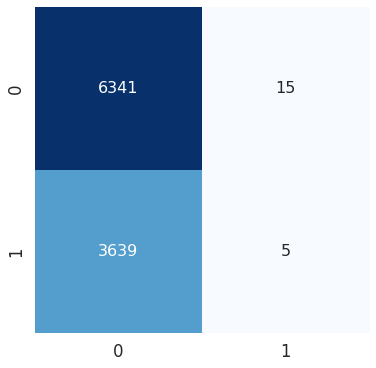

In [ ]:
#@title Logistic regression { display-mode: "form" }
model = LogisticRegression(random_state = 42, solver="newton-cg", penalty='l2')
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000]}

gridsearch_run(model, param_grid, model_name="LogReg")

{'n_neighbors': 14}
Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.90      0.75      6356
           1       0.39      0.11      0.18      3644

    accuracy                           0.61     10000
   macro avg       0.51      0.51      0.46     10000
weighted avg       0.55      0.61      0.54     10000

Confusion matrix--> tp= 5702 fn= 654 fp= 3226 tn= 418
Accuracy score--> 0.612
AUC -->  0.5059071042064026


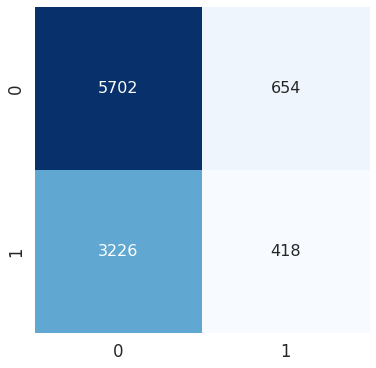

In [ ]:
#@title KneighboursClassifier { display-mode: "form" }
kn_clf = KNeighborsClassifier()
rangeval = np.arange(1, 15)
param_grid = dict(n_neighbors=rangeval)
knn_pred = gridsearch_run(kn_clf, param_grid, scoring='roc_auc', param=False, model_name="KNeighbors")

{'max_depth': 6, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.98      0.77      6356
           1       0.42      0.03      0.06      3644

    accuracy                           0.63     10000
   macro avg       0.53      0.50      0.41     10000
weighted avg       0.56      0.63      0.51     10000

Confusion matrix--> tp= 6209 fn= 147 fp= 3536 tn= 108
Accuracy score--> 0.6317
AUC -->  0.50325500369928


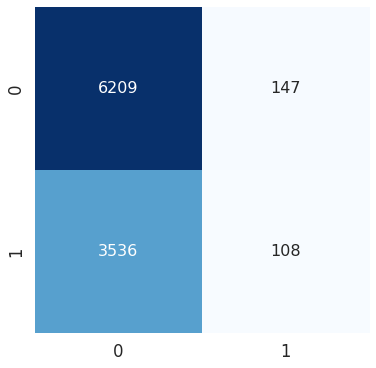

In [ ]:
#@title DecisionTreeClassifier { display-mode: "form" }
model = DecisionTreeClassifier(random_state=42)
param_grid = {"splitter":["best", "random"],
              "max_features":["log2", 2, 3, 4, 5, 6],
              "max_depth": [2, 3, 4, 5, 6],
              "min_samples_leaf": [1, 2, 3],
              "min_samples_split": [2, 3, 4, 5]}
decisionTr_pred = gridsearch_run(model, param_grid, model_name="DecisionTreeClassifier")

{'class_weight': 'balanced', 'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 80}
Classification report-->
               precision    recall  f1-score   support

           0       0.68      0.56      0.62      6356
           1       0.42      0.54      0.47      3644

    accuracy                           0.56     10000
   macro avg       0.55      0.55      0.54     10000
weighted avg       0.58      0.56      0.56     10000

Confusion matrix--> tp= 3583 fn= 2773 fp= 1676 tn= 1968
Accuracy score--> 0.5551
AUC -->  0.5518925910088499


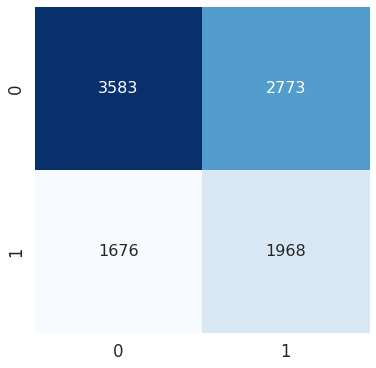

In [ ]:
#@title RandomForestClassfier { display-mode: "form" }
model = RandomForestClassifier(random_state=42,oob_score=True,n_jobs = -1)
param_grid = {"max_depth" : [20,30],
              "min_samples_leaf": [40,50,80],
              "max_features": ["log2", 5, 6,8],
              "class_weight" : ["balanced","balanced_subsample",None]}
RandomForest_pred = gridsearch_run(model, param_grid, model_name = "RandomForest")

{'class_weight': 'balanced', 'max_depth': 20, 'max_features': 8, 'min_samples_leaf': 80}
Classification report-->
               precision    recall  f1-score   support

           0       0.68      0.55      0.60      6356
           1       0.41      0.54      0.46      3644

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.58      0.54      0.55     10000

Confusion matrix--> tp= 3472 fn= 2884 fp= 1669 tn= 1975
Accuracy score--> 0.5447
AUC -->  0.5441211671349198


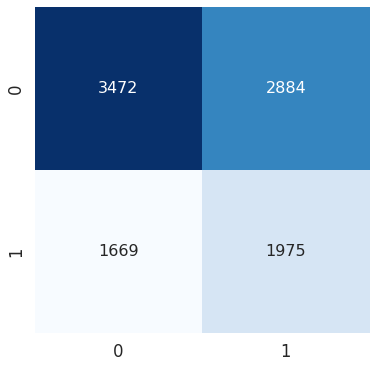

In [ ]:
#@title ExtraTreesClassifier { display-mode: "form" }
model = ExtraTreesClassifier(random_state=42, n_jobs = -1)
param_grid = {"max_depth" : [20,30],
              "min_samples_leaf": [40,50,80],
              "max_features": ["log2", 5, 6,8],
              "class_weight" : ["balanced","balanced_subsample",None]}
ExtraTrees_pred = gridsearch_run(model, param_grid, model_name="ExtraTreesClassifier")

In [ ]:
#@title GridSearch for Catboost { display-mode: "form" }
def CatBoost_gridsearch_run(param_grid, scoring='f1',nsplits=5, param=True, model_name="None_c"):
  X_train, y_train, X_test, y_test = preprocess_data(param)
  train_dataset = cb.Pool(X_train, y_train) 
  test_dataset = cb.Pool(X_test, y_test)
  grid_model = cb.CatBoostClassifier(objective='CrossEntropy')
  grid_model.grid_search(param_grid, train_dataset, cv=nsplits)
  y_pred = grid_model.predict(test_dataset)

  y_pred_prob = grid_model.predict_proba(test_dataset)
  auc = getAccuracy(y_test, y_pred)
  pd.DataFrame({"y_pred":y_pred, "y_prob_0": y_pred_prob[:,0], "y_prob_1" : y_pred_prob[:,1]}).to_csv(model_name+ "_" +str(auc)+"_predicted_.csv")
  return y_pred, y_pred_prob
  getAccuracy(y_test, y_pred)
  return y_pred, y_pred_prob

Streaming output truncated to the last 5000 lines.
114:	learn: 0.4110923	test: 0.6694553	best: 0.6517266 (20)	total: 6s	remaining: 9.64s
115:	learn: 0.4091874	test: 0.6700116	best: 0.6517266 (20)	total: 6.05s	remaining: 9.61s
116:	learn: 0.4073899	test: 0.6702714	best: 0.6517266 (20)	total: 6.11s	remaining: 9.55s
117:	learn: 0.4063203	test: 0.6708112	best: 0.6517266 (20)	total: 6.15s	remaining: 9.49s
118:	learn: 0.4034550	test: 0.6711476	best: 0.6517266 (20)	total: 6.2s	remaining: 9.43s
119:	learn: 0.4023757	test: 0.6713058	best: 0.6517266 (20)	total: 6.25s	remaining: 9.37s
120:	learn: 0.4008588	test: 0.6720100	best: 0.6517266 (20)	total: 6.31s	remaining: 9.34s
121:	learn: 0.3995295	test: 0.6723661	best: 0.6517266 (20)	total: 6.37s	remaining: 9.29s
122:	learn: 0.3985334	test: 0.6726359	best: 0.6517266 (20)	total: 6.43s	remaining: 9.25s
123:	learn: 0.3974656	test: 0.6725007	best: 0.6517266 (20)	total: 6.48s	remaining: 9.19s
124:	learn: 0.3962409	test: 0.6727710	best: 0.6517266 (20)	tota

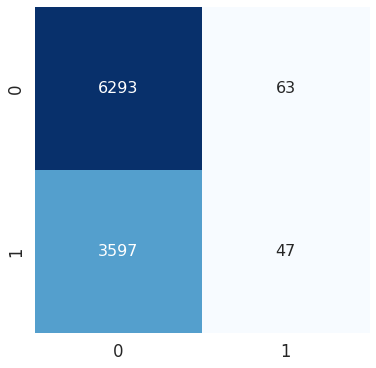

In [ ]:
#@title CatBoost { display-mode: "form" }
#21 mins
param_grid = {'iterations': [100, 150, 200,300],
        'learning_rate': [0.03, 0.1,0.25,0.5],
        'depth': [2, 4, 6, 8,10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
CatBoost_Pred = CatBoost_gridsearch_run(param_grid, nsplits=5, model_name="catBoost")

{'base_estimator__max_depth': 10, 'base_estimator__min_samples_leaf': 10, 'learning_rate': 0.1, 'n_estimators': 50}
Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.83      0.72      6356
           1       0.40      0.20      0.27      3644

    accuracy                           0.60     10000
   macro avg       0.52      0.52      0.50     10000
weighted avg       0.56      0.60      0.56     10000

Confusion matrix--> tp= 5265 fn= 1091 fp= 2906 tn= 738
Accuracy score--> 0.6003
AUC -->  0.5154379311940833


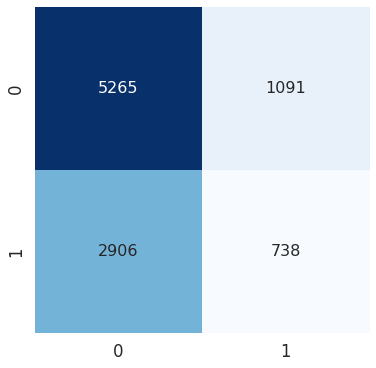

In [ ]:
#@title AdaBoostClassifier { display-mode: "form" }
model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid = {'base_estimator__max_depth':[3, 5, 10],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50],
              'learning_rate':[0.01,0.1]}

AdaBoost_pred = gridsearch_run(model, param_grid, model_name="AdaBoost")

{'booster': 'gbtree', 'eval_metric': 'logloss', 'max_depth': 30, 'n_estimators': 10, 'tree_method': 'hist'}
Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.81      0.71      6356
           1       0.38      0.21      0.27      3644

    accuracy                           0.59     10000
   macro avg       0.51      0.51      0.49     10000
weighted avg       0.54      0.59      0.55     10000

Confusion matrix--> tp= 5125 fn= 1231 fp= 2894 tn= 750
Accuracy score--> 0.5875
AUC -->  0.506071257596304


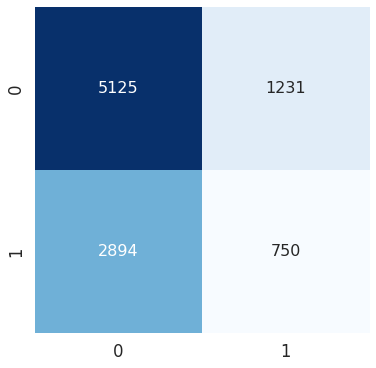

In [ ]:
#@title XGBClassifier { display-mode: "form" }

model = xgb.XGBClassifier()
param_grid = {
    'n_estimators' : [10, 30, 100],
    'booster' : ['gbtree', 'gblinear'],
    'tree_method' : ['approx', 'hist'],
    'max_depth' : [10, 30],
    'eval_metric' : ['logloss', 'error']
}

XGB_pred = gridsearch_run(model, param_grid, model_name="XGBClassifier")

In [ ]:
#@title SVC RBF Kernel { display-mode: "form" }

model = SVC()
param_grid = {
    "probability": [True],
    "kernel": ["rbf"],
    "gamma": ['scale', 'auto', 0.5, 5, 10],
    "C": [0.1, 1, 10]
}

gridsearch_run(model, param_grid)

In [ ]:
#@title SVC Poly Kernel { display-mode: "form" }

model = SVC()
param_grid = {
    "probability": [True],
    "kernel": ["poly"],
    "degree": [2, 3, 4],
    "C": [0.1, 1, 10]
}

gridsearch_run(model, param_grid)

In [ ]:
#@title SVC Linear Kernel { display-mode: "form" }

model = SVC()
param_grid = {
    "probability": [True],
    "kernel": ["linear"],
    "gamma": ['scale', 'auto', 0.5, 5, 10],
    "C": [0.1, 1, 10]
}

gridsearch_run(model, param_grid)

In [ ]:
#@title TabNet using PyTorch { display-mode: "form" }

X_train, y_train, X_test, y_test = preprocess_data()

# define the model
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
clf1_nopreproc.fit(
    X_train,y_train,
    eval_set=[(X_train, y_train)],
    eval_name=['train'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred = clf1_nopreproc.predict(X_test)

Device used : cpu
epoch 0  | loss: 0.70552 | train_auc: 0.53053 | train_accuracy: 0.60327 |  0:00:04s
epoch 1  | loss: 0.69435 | train_auc: 0.53951 | train_accuracy: 0.5271  |  0:00:07s
epoch 2  | loss: 0.6929  | train_auc: 0.53706 | train_accuracy: 0.47337 |  0:00:11s
epoch 3  | loss: 0.69242 | train_auc: 0.54354 | train_accuracy: 0.53237 |  0:00:15s
epoch 4  | loss: 0.69173 | train_auc: 0.54572 | train_accuracy: 0.5294  |  0:00:19s
epoch 5  | loss: 0.69125 | train_auc: 0.54695 | train_accuracy: 0.51087 |  0:00:23s
epoch 6  | loss: 0.69139 | train_auc: 0.54494 | train_accuracy: 0.5288  |  0:00:26s
epoch 7  | loss: 0.6914  | train_auc: 0.55271 | train_accuracy: 0.5335  |  0:00:30s
epoch 8  | loss: 0.6903  | train_auc: 0.55488 | train_accuracy: 0.5037  |  0:00:34s
epoch 9  | loss: 0.69015 | train_auc: 0.54982 | train_accuracy: 0.56447 |  0:00:38s
epoch 10 | loss: 0.68968 | train_auc: 0.55485 | train_accuracy: 0.54167 |  0:00:42s
epoch 11 | loss: 0.68867 | train_auc: 0.56094 | train_accu

Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.84      0.73      6356
           1       0.38      0.17      0.24      3644

    accuracy                           0.60     10000
   macro avg       0.51      0.51      0.48     10000
weighted avg       0.55      0.60      0.55     10000

Confusion matrix--> tp= 5360 fn= 996 fp= 3026 tn= 618
Accuracy score--> 0.5978
AUC -->  0.5064457622001978


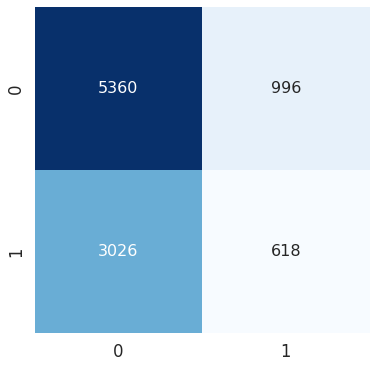

In [ ]:
y_pred_prob = clf1_nopreproc.predict_proba(X_test)
auc = getAccuracy(y_test, y_pred)

pd.DataFrame({"y_pred":y_pred, "y_prob_0": y_pred_prob[:,0], "y_prob_1" : y_pred_prob[:,1]}).to_csv("TabNet"+ "_" +str(auc)+"_predicted_.csv")
TabNet_pred = y_pred, y_pred_prob

**Voting for Ensemble of NN + Boosting
https://machinelearningmastery.com/combine-predictions-for-ensemble-learning/**

oobe_score------> 0.6363333333333333
oobe_dec_func---->
 [[0.56370235 0.43629765]
 [0.63603967 0.36396033]
 [0.64931899 0.35068101]
 ...
 [0.61000083 0.38999917]
 [0.67775095 0.32224905]
 [0.57745594 0.42254406]]
Classification report-->
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      3795
           1       0.00      0.00      0.00      2205

    accuracy                           0.63      6000
   macro avg       0.32      0.50      0.39      6000
weighted avg       0.40      0.63      0.49      6000

Confusion matrix--> tp= 3795 fn= 0 fp= 2205 tn= 0
Accuracy score--> 0.6325
AUC -->  0.5


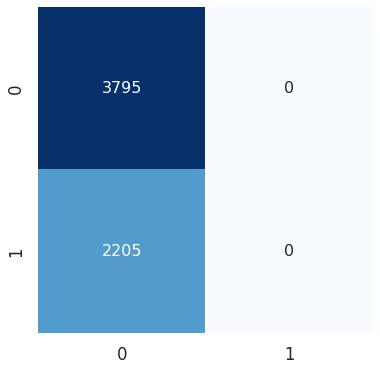

In [ ]:
#@title BaggingClassifier with oobe=True and best params for DT  { display-mode: "form" }
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=1, min_samples_split=2, splitter='best'), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True) #bagging
X_train, y_train, X_test, y_test = preprocess_data()
bag_clf.fit(X_train, y_train)
print("oobe_score------>", bag_clf.oob_score_)
print("oobe_dec_func---->\n", bag_clf.oob_decision_function_)
y_pred = bag_clf.predict(X_test)
getAccuracy(y_test, y_pred)

Classification report-->
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      3795
           1       0.41      0.00      0.01      2205

    accuracy                           0.63      6000
   macro avg       0.52      0.50      0.39      6000
weighted avg       0.55      0.63      0.49      6000

Confusion matrix--> tp= 3782 fn= 13 fp= 2196 tn= 9
Accuracy score--> 0.6318333333333334
AUC -->  0.5003280363528811


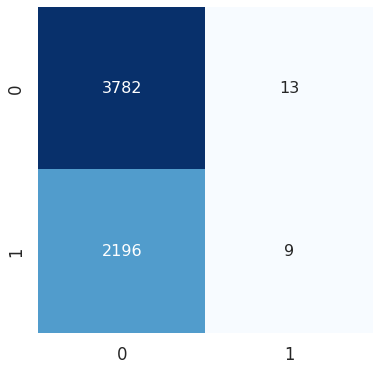

In [ ]:
#@title BaggingClassifier(pasting) and best params for DT { display-mode: "form" }
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=1, min_samples_split=2, splitter='best'), n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1)#pasting
X_train, y_train, X_test, y_test = preprocess_data()
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
getAccuracy(y_test, y_pred)

In [ ]:
#@title Hardvoting classfier with LR, RF, ET, ADA, GB { display-mode: "form" }
#hard voting classifier
from sklearn.ensemble import GradientBoostingClassifier
log_clf = LogisticRegression(random_state = 42, C=100, solver="newton-cg")
rnd_clf = RandomForestClassifier(random_state = 42, class_weight='balanced_subsample', max_depth=30, max_features=6, min_samples_leaf=80)
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, min_samples_leaf=10), random_state = 42, learning_rate=0.1, n_estimators=50)
gdb = GradientBoostingClassifier(random_state = 42, learning_rate=0.8, n_estimators=64)
etc = ExtraTreesClassifier(random_state = 42, class_weight='balanced_subsample', max_depth=30, max_features=6, min_samples_leaf=80)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('ada', ada), ('gdb', gdb), ('etc', etc)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
getAccuracy(y_test, y_pred)

Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.93      0.76      3795
           1       0.45      0.10      0.17      2205

    accuracy                           0.62      6000
   macro avg       0.54      0.51      0.46      6000
weighted avg       0.57      0.62      0.54      6000

Confusion matrix--> tp= 3511 fn= 284 fp= 1977 tn= 228
Accuracy score--> 0.6231666666666666
AUC -->  0.5142830254631497


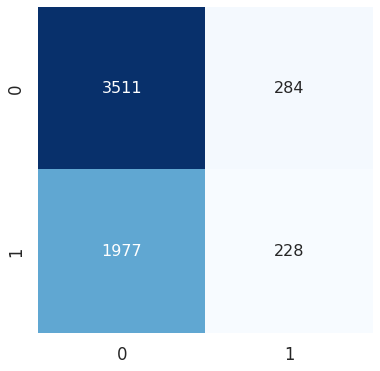

In [ ]:
#@title Softvoting classifier with LR, RF, ET, ADA, GB { display-mode: "form" }
#soft voting classifier
from sklearn.ensemble import GradientBoostingClassifier
log_clf = LogisticRegression(random_state = 42, C=100, solver="newton-cg")
rnd_clf = RandomForestClassifier(random_state = 42, class_weight='balanced_subsample', max_depth=30, max_features=6, min_samples_leaf=80)
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10, min_samples_leaf=10), random_state = 42, learning_rate=0.1, n_estimators=50)
gdb = GradientBoostingClassifier(random_state = 42, learning_rate=0.8, n_estimators=64)
etc = ExtraTreesClassifier(random_state = 42, class_weight='balanced_subsample', max_depth=30, max_features=6, min_samples_leaf=80)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('ada', ada), ('gdb', gdb), ('etc', etc)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
getAccuracy(y_test, y_pred)

In [ ]:
#@title Voting CLassifier with (RandomForestClassifier, SVC, KNeighborsClassifier, GaussianNB, CatBoostClassifier, CatBoostClassifier and XGBClassifier)
from catboost.core import CatBoostClassifier
from xgboost import XGBClassifier
def evaluateCVModel(X_train, y_train, X_test, y_test):
  # model = modelPipeline[0]
  # pipeline = modelPipeline[1]
  #soft voting classifier
  # log_clf = LogisticRegression(
  #                               solver ='lbfgs',
  #                              penalty = 'l2',
  #                               multi_class ='auto',
  #                              warm_start=False,
  #                               max_iter = 100, 
  #                              random_state=42, 
  #                             n_jobs=-1
  #                             )
  rnd_clf = RandomForestClassifier(
                                oob_score=True, 
                                warm_start=True, # from GridSearchCV
                                criterion='gini', # from GridSearchCV
                                n_estimators=100, # from GridSearchCV
                                max_depth=50, # from GridSearchCV
                                random_state=42
                            )
  svm_clf = SVC(
                C=0.75, # from GridSearchCV
                probability=True, 
                max_iter= 500, # from GridSearchCV
                random_state=42
                )
  knn_clf = KNeighborsClassifier(
                                n_neighbors=2,
                                weights='distance',
                                leaf_size=10,
                                n_jobs=-1
                                )
  gaus_clf = GaussianNB(
    var_smoothing=1e-11
    )
  cat_clf = CatBoostClassifier(
                        iterations=500,# from GridSearchCV
                        learning_rate=0.95,
                        depth=5, # from GridSearchCV
                        random_state=42)
  bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter='best'), 
                            # n_estimators=100, 
                            n_estimators=500, # from GridSearchCV
                            bootstrap=False,  # from GridSearchCV
                            n_jobs=-1)
  xg_clf = XGBClassifier(
                    order='F',
                    n_estimators=15,
                    random_state=42,
                    max_depth=10,
                    gamma=0.2,
                    learning_rate=0.9,
                   n_jobs=-1
                  )

  voting_clf = VotingClassifier(estimators=[
                                            # ('lr', log_clf), 
                                            ('rf', rnd_clf), 
                                            ('svc', svm_clf),
                                            ('gaus', gaus_clf),
                                            ('knn', knn_clf),
                                            ('cat', cat_clf),
                                            ('xgb', xg_clf),
                                            ('bag', bag_clf),
                                          ],
                                voting='soft', 
                                n_jobs=-1
                                # random_state=42
                              )
  voting_clf.fit(X_train, y_train)
  y_pred = voting_clf.predict(X_test)
  # acc_score = accuracy_score(y_test, y_pred)
  # print(acc_score)
  # cm = confusion_matrix(y_test, y_pred)   
  # tp, fn, fp, tn = cm.reshape(-1)
  # print('tp=', tp, 'fn=', fn, 'fp=', fp, 'tn=', tn)


  # RMSE = mean_squared_error(y1, y_test_predict, squared=False)
  # R2 = r2_score(y1, y_test_predict, multioutput='variance_weighted')
  # printmd("**Model : "+type(model).__name__+",  RMSE = " +str(RMSE)+ ", R2 ="+ str(R2) + "**")

  return y_pred, y_test, voting_clf
  
param = False
X_train_votg, y_train_votg, X_test_votg, y_test_votg = preprocess_data(param)
y_pred_voting, y_test_voting, voting_clf = evaluateCVModel(X_train_votg, y_train_votg, X_test_votg, y_test_votg)
getAccuracy(y_test_voting, y_pred_voting)

In [ ]:
#@title Stratified spliting for LightGBM { display-mode: "form" }
N_SPLITS = 5
col_y = 'song_popularity'

X = df.copy()
y = X.pop(col_y)

col_cat = ['key', 'audio_mode', 'time_signature']
col_num = X.drop(columns=col_cat).columns
missing_ind = impute.MissingIndicator(features='missing-only')
missing_values = missing_ind.fit_transform(X)

missing_values = pd.DataFrame(missing_values, index=X.index)


# all categorical except `key` because it contains too many classes
# (split of less than 1 combination)
col_strat = [col_y, 'audio_mode', 'time_signature']

strat, _ = (
    df[['audio_mode', 'time_signature', col_y]]
    .join(missing_values.any(axis=1).rename('missing'))
    .astype('str')
    .apply(lambda row: '_'.join(row), axis=1)
    .factorize()
)
strat = pd.Series(strat, index=df.index)


# Split dev/test
X_dev, X_test, y_dev, y_test = train_test_split(
    X, y, test_size=0.1, random_state=random_state, shuffle=True, stratify=strat)

dev_index = X.index.isin(X_dev.index).astype(int)
test_split = PredefinedSplit(dev_index)

strat_dev = strat.loc[X_dev.index]
strat_test = strat.loc[X_test.index]


# Split train/valid
def make_folds(X, strat):
    strat_folds = StratifiedKFold(n_splits=N_SPLITS,
                                  shuffle=True,
                                  random_state=random_state)

    cv_fold = np.empty([len(X), 1], dtype=np.int32)

    for i, (_, test_index) in enumerate(strat_folds.split(X, strat)):
        cv_fold[test_index] = i

    return PredefinedSplit(cv_fold)
    
cv_split = make_folds(X_dev, strat_dev)
full_split = make_folds(X, strat)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'imputer': KNNImputer(n_neighbors=2), 'model': LGBMClassifier()}
Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.96      0.77      6356
           1       0.47      0.07      0.11      3644

    accuracy                           0.63     10000
   macro avg       0.56      0.51      0.44     10000
weighted avg       0.58      0.63      0.53     10000

Confusion matrix--> tp= 6091 fn= 265 fp= 3407 tn= 237
Accuracy score--> 0.6328
AUC -->  0.5116727653551204


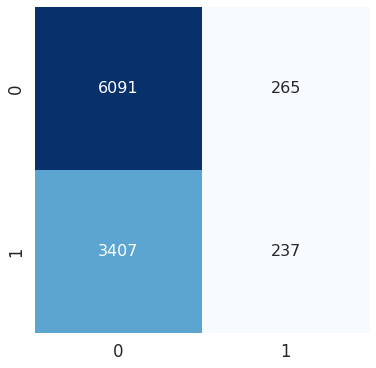

In [ ]:
#@title LightGBM with KNN imputation { display-mode: "form" }

random_state = 42
col_sig = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'speechiness',
    'audio_valence',
]
col_pow = [ 'song_duration_ms', 'tempo']

# Model Pipeline


pipe = Pipeline([
    ('imputer',impute.KNNImputer(n_neighbors=2)),
    ('model', LogisticRegression())
])

param_grid = [{
    'model': [LGBMClassifier()],
    'imputer': [impute.KNNImputer(n_neighbors=2)],
    
}]

#gridsearch_run(pipe, param_grid, scoring=['roc_auc', 'neg_log_loss'])

grid_model = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=['roc_auc', 'neg_log_loss'],
    n_jobs=4,
    refit='roc_auc',
    cv=10,
    verbose=1,
    error_score='raise',
    return_train_score=True
)

X_train, y_train, X_test, y_test = getRawData()

grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
y_pred = grid_model.predict(X_test)
y_pred_prob = grid_model.predict_proba(X_test)
auc = getAccuracy(y_test, y_pred)

pd.DataFrame({"y_pred":y_pred, "y_prob_0": y_pred_prob[:,0], "y_prob_1" : y_pred_prob[:,1]}).to_csv("LightGBM_WithKNN"+ "_" +str(auc)+"_predicted_.csv")
LightGBM_1_pred = y_pred, y_pred_prob

Fitting 10 folds for each of 1 candidates, totalling 10 fits
{'imputer': IterativeImputer(random_state=42), 'model': LGBMClassifier()}
Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.96      0.77      6356
           1       0.47      0.06      0.11      3644

    accuracy                           0.63     10000
   macro avg       0.55      0.51      0.44     10000
weighted avg       0.58      0.63      0.53     10000

Confusion matrix--> tp= 6101 fn= 255 fp= 3422 tn= 222
Accuracy score--> 0.6323
AUC -->  0.5104012458042014


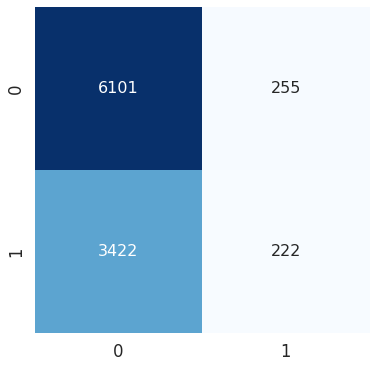

In [ ]:
#@title LightGBM with Iterative imputation { display-mode: "form" }

random_state = 42
col_sig = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'speechiness',
    'audio_valence',
]
col_pow = [ 'song_duration_ms', 'tempo']

# Model Pipeline


pipe = Pipeline([
    ('imputer',impute.KNNImputer(n_neighbors=2)),
    ('model', LogisticRegression())
])

param_grid = [{
    'model': [LGBMClassifier()],
    'imputer': [impute.IterativeImputer(random_state=random_state)],
    
}]

#gridsearch_run(pipe, param_grid, scoring=['roc_auc', 'neg_log_loss'])

grid_model = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=['roc_auc', 'neg_log_loss'],
    n_jobs=4,
    cv=10,
    refit='roc_auc',
    verbose=1,
    error_score='raise',
    return_train_score=True
)

X_train, y_train, X_test, y_test = getRawData()

grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
y_pred = grid_model.predict(X_test)
y_pred_prob = grid_model.predict_proba(X_test)
auc = getAccuracy(y_test, y_pred)

pd.DataFrame({"y_pred":y_pred, "y_prob_0": y_pred_prob[:,0], "y_prob_1" : y_pred_prob[:,1]}).to_csv("LightGBM_IterativeImp"+ "_" +str(auc)+"_predicted_.csv")
LightGBM_1_pred = y_pred, y_pred_prob

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'imputer': IterativeImputer(random_state=42), 'model': HistGradientBoostingClassifier()}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in log


Classification report-->
               precision    recall  f1-score   support

           0       0.64      0.99      0.78      6356
           1       0.49      0.02      0.03      3644

    accuracy                           0.64     10000
   macro avg       0.56      0.50      0.40     10000
weighted avg       0.58      0.64      0.51     10000

Confusion matrix--> tp= 6290 fn= 66 fp= 3580 tn= 64
Accuracy score--> 0.6354
AUC -->  0.5035896141074166


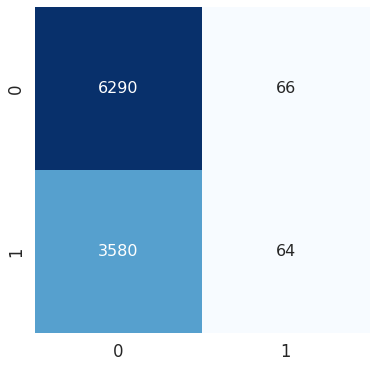

In [ ]:
#@title Online inspired code { display-mode: "form" }
#Challenge Winner's code
random_state = 42
col_sig = [
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'speechiness',
    'audio_valence',
]
col_pow = [ 'song_duration_ms', 'tempo']

# Model Pipeline
inv_sigmoid = Pipeline([
    ('0', preprocessing.MinMaxScaler(feature_range=(1e-3, 1-1e-3))),
    ('1', FunctionTransformer(lambda x: np.log(x / (1-x)))),
    ('2', preprocessing.PowerTransformer())
])

transformer = ColumnTransformer([
    ('inv_sigmoid', inv_sigmoid, col_sig),
    ('scale', preprocessing.PowerTransformer(), col_pow),
    ('db_to_num', FunctionTransformer(lambda x: np.log1p(-x)), ['loudness']),
], remainder='passthrough')

pipe = Pipeline([
    ('transform', transformer),
    ('imputer', impute.SimpleImputer(strategy='median')),
    ('model', LogisticRegression())
])

param_grid = [{
    'model': [LogisticRegression(),
              HistGradientBoostingClassifier(),
              LGBMClassifier(),
              ExtraTreesClassifier()],
    'imputer': [impute.SimpleImputer(strategy='median'),
                impute.SimpleImputer(strategy='mean'),
               ],#impute.KNNImputer()],
    'transform__inv_sigmoid__0': ['passthrough'],
    'transform__inv_sigmoid__1': ['passthrough'],
},{
    'model': [LogisticRegression(),
              HistGradientBoostingClassifier(),
              LGBMClassifier(),
              ExtraTreesClassifier()],
    'imputer': [impute.SimpleImputer(strategy='median'),
                impute.SimpleImputer(strategy='mean'),
                ],#impute.KNNImputer()],
},{
    'model': [HistGradientBoostingClassifier(), LGBMClassifier()],
    'imputer': ['passthrough',
                impute.IterativeImputer(random_state=random_state),
                impute.IterativeImputer(random_state=random_state, add_indicator=True)],
},{
    'model': [HistGradientBoostingClassifier(), LGBMClassifier()],
    'imputer': ['passthrough'],
    'transform__inv_sigmoid__0': ['passthrough'],
    'transform__inv_sigmoid__1': ['passthrough'],
}]

#gridsearch_run(pipe, param_grid, scoring=['roc_auc', 'neg_log_loss'])

grid_model = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=['roc_auc', 'neg_log_loss'],
    n_jobs=4,
    refit='roc_auc',
    cv=5,
    verbose=1,
    error_score='raise',
    return_train_score=True
)

X_train, y_train, X_test, y_test = getRawData()

grid_model.fit(X_train, y_train)
print(grid_model.best_params_)
y_pred = grid_model.predict(X_test)
y_pred_prob = grid_model.predict_proba(X_test)
auc = getAccuracy(y_test, y_pred)

pd.DataFrame({"y_pred":y_pred, "y_prob_0": y_pred_prob[:,0], "y_prob_1" : y_pred_prob[:,1]}).to_csv("LightGBM_GridSearch"+ "_" +str(auc)+"_predicted_.csv")
LightGBM_1_pred = y_pred, y_pred_prob

In [ ]:
#@title Split Based Modelling { display-mode: "form" }
def getMask(df, feature):
  map_dict = {
      'instrumentalness': (df['instrumentalness'] <= 0.002),
      'liveness': ((df['liveness'] >= 0.1) & (df['liveness'] <= 0.2)),
      'audio_mode': (df['audio_mode'] == 1),
      'time_signature': (df['time_signature'] == 4)
  }
  return map_dict.get(feature)

def split_data(mask,X):
  dfWithClass = X[mask].copy()
  dfWithoutClass = X[~mask].copy()
  dfWithClass.reset_index(drop=True, inplace=True)
  dfWithoutClass.reset_index(drop=True, inplace=True)
  return dfWithClass,dfWithoutClass
def prepare_data_split(train, test, categorical_col, numerical_col, numneighbours, feature):
  """ Preprocessing the data"""
  #Function takes input the creditcard_dataset and the list of the names of categorical columns and numerical columns, and 
  #returns the array of predictor and target variables by applying one-hot encoding and feature scaling
  train.drop(columns=['id'], axis=1, inplace=True)
  test.drop(columns=['id'], axis=1, inplace=True)


  X_train = np.array([]); y_train = np.array([]); X_test = np.array([]); y_test = np.array([]); 


  mask_train = getMask(train,feature)
  mask_test = getMask(test,feature)
  #mask_pred = getMask(pred,feature)


  trainWithClass, trainWithoutClass = split_data(mask_train,train)
  testWithClass, testWithoutClass = split_data(mask_test,test)
  #predWithClass, predWithoutClass = split_data(mask_pred,pred)


  X_withClass = trainWithClass.drop(['song_popularity'], axis=1)
  y_train_withClass = trainWithClass['song_popularity']
  X_withoutClass = trainWithoutClass.drop(['song_popularity'], axis=1)
  y_train_withoutClass = trainWithoutClass['song_popularity']

  # Do not touch test data
  X_t_withClass = testWithClass.drop(['song_popularity'], axis=1)
  y_test_withClass = testWithClass['song_popularity']
  X_t_withoutClass = testWithoutClass.drop(['song_popularity'], axis=1)
  y_test_withoutClass = testWithoutClass['song_popularity']

  #X_pred_withClass = predWithClass.drop(['song_popularity'], axis=1)
  #y_pred_withClass = predWithClass['song_popularity']
  #X_pred_withoutClass = predWithoutClass.drop(['song_popularity'], axis=1)
  #y_pred_withoutClass = predWithoutClass['song_popularity']

  

  num_pipeline_withClass = Pipeline([('imputer', KNNImputer(n_neighbors=numneighbours)),('scaler',StandardScaler())])

  cat_pipeline_withClass = Pipeline([('imputer', KNNImputer(n_neighbors=numneighbours)),('encoder',OneHotEncoder(handle_unknown = 'ignore'))])

  full_pipeline_withClass = ColumnTransformer([('num',num_pipeline_withClass, numerical_col),('cat',cat_pipeline_withClass,categorical_col)])
  
  num_pipeline_withoutClass = Pipeline([('imputer', KNNImputer(n_neighbors=numneighbours)),('scaler',StandardScaler())])

  cat_pipeline_withoutClass = Pipeline([('imputer', KNNImputer(n_neighbors=numneighbours)),('encoder',OneHotEncoder(handle_unknown = 'ignore'))])

  full_pipeline_withoutClass = ColumnTransformer([('num',num_pipeline_withoutClass, numerical_col),('cat',cat_pipeline_withoutClass,categorical_col) ])
  
  X_train_withClass = full_pipeline_withClass.fit_transform(X_withClass)
  X_train_withoutClass = full_pipeline_withoutClass.fit_transform(X_withoutClass)

  X_test_withClass = full_pipeline_withClass.transform(X_t_withClass)
  X_test_withoutClass = full_pipeline_withoutClass.transform(X_t_withoutClass)

  #X_pred_withClass = full_pipeline_withClass.transform(X_pred_withClass)
  #X_pred_withoutClass = full_pipeline_withoutClass.transform(X_pred_withoutClass)
  ###############################
  return X_train_withClass,X_train_withoutClass, y_train_withClass,y_train_withoutClass, X_test_withClass,X_test_withoutClass, y_test_withClass, y_test_withoutClass#, X_pred_withClass, X_pred_withoutClass, y_pred_withClass, y_pred_withoutClass

#train, test = train_test_split(df, test_size=0.2, random_state=100)
#train, test = stratified_sampling(df)
def preprocess_data_split(feature, param=True):
  train_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/team3_train.csv'
  test_path = '/content/drive/Shareddrives/DA224-O/mp_2/data/team3_test.csv'
  #pred_path  = "/content/drive/Shareddrives/DA224-O/mp_2/data/kaggle/test.csv"
  #pred_df2  = pd.read_csv(pred_path)

  #pred_df2['song_popularity'] = 0
  #print(pred_df2.info())
  mainDF_train = pd.read_csv(train_path, index_col=0)
  mainDF_test = pd.read_csv(test_path, index_col=0)
  categorical_col = ['key', 'audio_mode', 'time_signature',]
  numerical_col = ['song_duration_ms', 'acousticness', 'danceability', 'energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',  'audio_valence']

  X_train_withClass, X_train_withoutClass, y_train_withClass, y_train_withoutClass, X_test_withClass, X_test_withoutClass, y_test_withClass, y_test_withoutClass = prepare_data_split(mainDF_train, mainDF_test, categorical_col, numerical_col, 3, feature)
  return X_train_withClass, X_train_withoutClass, y_train_withClass, y_train_withoutClass, X_test_withClass, X_test_withoutClass, y_test_withClass, y_test_withoutClass
def CatBoost_gridsearch_run_split(param_grid, feature, scoring='f1', nsplits=5, param=True):
  predicted = []
  ground_truth = []

  X_train_withClass, X_train_withoutClass, y_train_withClass, y_train_withoutClass, X_test_withClass, X_test_withoutClass, y_test_withClass, y_test_withoutClass = preprocess_data_split(feature, param)
  train_dataset_wc = cb.Pool(X_train_withClass, y_train_withClass)
  train_dataset_woc = cb.Pool(X_train_withoutClass, y_train_withoutClass)

  test_dataset_wc = cb.Pool(X_test_withClass, y_test_withClass)
  test_dataset_woc = cb.Pool(X_test_withoutClass, y_test_withoutClass)

  #pred_dataset_wc = cb.Pool(X_pred_withClass, y_pred_withClass)
  #pred_dataset_woc = cb.Pool(X_pred_withoutClass, y_pred_withoutClass)
  
  grid_model_wc = cb.CatBoostClassifier(objective='CrossEntropy', silent=True)
  grid_model_wc.grid_search(param_grid, train_dataset_wc)

  grid_model_woc = cb.CatBoostClassifier(objective='CrossEntropy', silent=True)
  grid_model_woc.grid_search(param_grid, train_dataset_woc)

  y_p_withClass = grid_model_wc.predict(X_test_withClass)
  predicted.extend(y_p_withClass)
  ground_truth.extend(y_test_withClass)

  y_p_withoutClass = grid_model_woc.predict(X_test_withoutClass)
  predicted.extend(y_p_withoutClass)
  ground_truth.extend(y_test_withoutClass)

  getAccuracy(ground_truth, predicted)

features = ['instrumentalness', 'liveness', 'audio_mode', 'time_signature']
for feature in features:
  print("Feature_Split: ", feature)
  param_grid = {'iterations': [100, 150, 200,300],
        'learning_rate': [0.03, 0.1,0.25,0.5],
        'depth': [2, 4, 6, 8,10],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
  CatBoost_gridsearch_run_split(param_grid,feature,nsplits=5)

In [ ]:
lightgbm = pd.read_csv(LightGBMFile)
pred = lightgbm.copy()
pred[pred["song_popularity"] > 0.5] = 1
pred[pred["song_popularity"] <= 0.5] = 0
lightgbm["y_pred"] = pred["song_popularity"]
lightgbm["y_prob_1"] = lightgbm["song_popularity"]
lightgbm["y_prob_0"] = 1 - lightgbm["song_popularity"]

lightgbm.to_csv("LightGBM_0.57732_predicted_.csv")

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, auc

**Ensembling TABNet + Boosting**

In [ ]:
def getResult(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  tp, fn, fp, tn = cm.reshape(-1)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc_score = auc(fpr, tpr)
  return auc_score 

In [ ]:
def getEnsembledResult(model_1, model_2, ground_truth, stratergy="AVG", model_1_weight=1, model_2_weight=1):
  model_1_pred = model_1["y_pred"]
  model_2_pred = model_2["y_pred"]
  y_test = ground_truth["song_popularity"]

  if stratergy == "AVG":
    model_1_2 = pd.DataFrame({"y_pred": ((model_1_pred) + (model_2_pred))/2})

  if stratergy == "MAX_PROB":
    probs_1 = model_1["y_prob_1"]
    probs_2 = model_2["y_prob_1"]
    model_1_2 = pd.DataFrame({ "model_1_probs": probs_1, "model_2_probs": probs_2})
    model_1_2["y_pred"] = model_1_2[["model_1_probs", "model_2_probs"]].max(axis=1)

  if stratergy == "AVG_PROB":
    probs_1 = model_1["y_prob_1"]
    probs_2 = model_2["y_prob_1"]
    model_1_2 = pd.DataFrame({"y_pred": ((probs_1) + (probs_2))/2})

  if stratergy == "WEIGHTED_AVG_PROB":
    probs_1 = model_1["y_prob_1"]
    probs_2 = model_2["y_prob_1"]
    model_1_2 = pd.DataFrame({"y_pred": ((model_1_weight * probs_1) + (model_2_weight * probs_2))/2})

  if stratergy == "SUM_PROB":
    probs_1 = model_1["y_prob_1"]
    probs_2 = model_2["y_prob_1"]
    model_1_2 = pd.DataFrame({"y_pred": ((probs_1) + (probs_2))})

  if stratergy == "WEIGHTED_SUM_PROB":
    probs_1 = model_1["y_prob_1"]
    probs_2 = model_2["y_prob_1"]
    model_1_2 = pd.DataFrame({"y_pred": ((model_1_weight * probs_1) + (model_2_weight * probs_2))})

  model_1_2[model_1_2["y_pred"] > 0.5] = 1
  model_1_2[model_1_2["y_pred"] <= 0.5] = 0

  ans = getResult(model_1_2["y_pred"], y_test)
  print(stratergy , " -> ", ans)
  return ans

In [ ]:
def getEnsembledResultMulti(models, ground_truth, stratergy="AVG", model_1_weight=1, model_2_weight=1):
  y_test = ground_truth["song_popularity"]

  if stratergy == "AVG":
    model_final = pd.DataFrame()
    index = 1
    col_list = []
    for model in models:
      model_final[str(index)] = model["y_pred"]
      col_list.append(str(index))
      index += 1

    model_final["y_pred"] = model_final[col_list].mean(axis=1)

  if stratergy == "MAX_PROB":
    model_final = pd.DataFrame()
    index = 1
    col_list = []
    for model in models:
      model_final[str(index)] = model["y_prob_1"]
      col_list.append(str(index))
      index += 1

    model_final["y_pred"] = model_final[col_list].max(axis=1)

  if stratergy == "AVG_PROB":
    model_final = pd.DataFrame()
    index = 1
    col_list = []
    for model in models:
      model_final[str(index)] = model["y_prob_1"]
      col_list.append(str(index))
      index += 1

    model_final["y_pred"] = model_final[col_list].mean(axis=1)

  if stratergy == "SUM_PROB":
    model_final = pd.DataFrame()
    index = 1
    col_list = []
    for model in models:
      model_final[str(index)] = model["y_prob_1"]
      col_list.append(str(index))
      index += 1

    model_final["y_pred"] = model_final[col_list].sum(axis=1)

  model_final[model_final["y_pred"] > 0.5] = 1
  model_final[model_final["y_pred"] <= 0.5] = 0

  ans = getResult(model_final["y_pred"], y_test)
  return ans

In [ ]:
TabNetFile = "TabNet_0.5064457622001978_predicted_.csv"
AdaBoostFile = "AdaBoost_0.5154379311940833_predicted_.csv"
CatBoostFile = "catBoost_0.5014930100533374_predicted_.csv"
XGBFile = "XGBClassifier_0.506071257596304_predicted_.csv"
DecisionTreeFile = "DecisionTreeClassifier_0.50325500369928_predicted_.csv"
ExtraTreeFile = "ExtraTreesClassifier_0.5441211671349198_predicted_.csv"
KNNFile = "KNeighbors_0.5059071042064026_predicted_.csv"
LightGBMFile = "LightGBM_0.57732_predicted_.csv"
solution = "solution.csv"

tabnet = pd.read_csv(TabNetFile)
adaboost = pd.read_csv(AdaBoostFile)
catboost = pd.read_csv(CatBoostFile)
xgboost = pd.read_csv(XGBFile)
lightgbm = pd.read_csv(LightGBMFile)
decisionTree = pd.read_csv(DecisionTreeFile)
extraTree = pd.read_csv(ExtraTreeFile)
knnClassifier = pd.read_csv(KNNFile)

ground_truth = pd.read_csv(solution)

In [ ]:
model_data = {
    "TabNet": tabnet, "AdaBoost" : adaboost, "CatBoost": catboost, "LightGBM":lightgbm, "XGBoost" : xgboost,
    "DecisionTree" : decisionTree, "ExtraTrees" : extraTree, "KNNCkassifier" :  knnClassifier
    }

In [ ]:
models = ["TabNet", "AdaBoost", "CatBoost",  "LightGBM", "XGBoost", "DecisionTree",  "ExtraTrees",  "KNNCkassifier"]
Strategies = ["AVG", "MAX_PROB", "AVG_PROB", "SUM_PROB"]

models_variants = [["TabNet", "AdaBoost"], ["TabNet", "CatBoost"], ["TabNet", "LightGBM"], ["TabNet", "XGBoost"], 
                   ["TabNet", "DecisionTree"], ["TabNet", "ExtraTrees"], ["TabNet", "KNNCkassifier"], 

                   ["LightGBM", "AdaBoost"], ["LightGBM", "CatBoost"], ["LightGBM", "XGBoost"], 
                   ["LightGBM", "DecisionTree"], ["LightGBM", "ExtraTrees"], ["LightGBM", "KNNCkassifier"],

                   ["TabNet", "AdaBoost", "CatBoost", "LightGBM"], ["TabNet", "CatBoost", "AdaBoost","XGBoost", "LightGBM"],
                   
                   
                   ["LightGBM"], ["TabNet"], ["XGBoost"], ["DecisionTree"], ["ExtraTrees"], ["KNNCkassifier"], ["CatBoost"], ["AdaBoost"]]

In [ ]:
data = {"Models Ensembled" : [], "Ensembling Strategy" : [], "AUC":[]}
for variant in models_variants:
  models = [model_data[model] for model in variant]
  modes_name = variant[0]
  for model in variant[1:]:
    modes_name += " + " + model

  for st in Strategies:
    if len(models) == 1:
      score = getEnsembledResultMulti(models, ground_truth, "MAX_PROB")
      data["Models Ensembled"].append(modes_name)
      data["Ensembling Strategy"].append(st)
      data["AUC"].append(score)
      break
    else:
      score = getEnsembledResultMulti(models, ground_truth, st)
      data["Models Ensembled"].append(modes_name)
      data["Ensembling Strategy"].append(st)
      data["AUC"].append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:992: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning,
/usr/local/lib/pytho

In [ ]:
Report = pd.DataFrame(data)
Report = Report.dropna()
Report = Report.sort_values(by=['AUC'], ascending=False, ignore_index=True)

In [ ]:
Report

,Models Ensembled,Ensembling Strategy,AUC
0,LightGBM + DecisionTree,AVG,0.629494
1,TabNet + LightGBM,AVG,0.609148
2,TabNet + AdaBoost + CatBoost + LightGBM,AVG,0.582889
3,LightGBM + XGBoost,AVG,0.580551
4,LightGBM + AdaBoost,AVG,0.579413
...,...,...,...
56,TabNet + XGBoost,MAX_PROB,0.509948
57,TabNet + KNNCkassifier,AVG,0.509790
58,TabNet + DecisionTree,MAX_PROB,0.509618
59,XGBoost,AVG,0.508852


In [ ]:
Report.to_csv("EnsembleReport.csv")